# Assignment : Bike Rental Linear Regression

# Outline

1) Reading, understanding and cleaning the data

2) EDA

3) Data Preparation for Linear Regression (train-test split, rescaling)

4) Build Model

5) Training the model

6) Residual Analysis

7) Model Evaluation

8) Making Predictions

<h2> Importing Libraries </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<h2>Reading, understanding and cleaning the data</h2>

In [5]:
bike_analysis_df = pd.read_csv("day.csv")

In [6]:
bike_analysis_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_analysis_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike_analysis_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
bike_analysis_df.shape

(730, 16)

### DATA QUALITY CHECKS

#### - Reading data and performing basic checks
#### - Datetime formatted date
#### - Categorical variables appropriately converted
#### - Derived metrics as additional features
#### - Dummies for all categorical variables

In [11]:
# Checking for missing values
missing_values = bike_analysis_df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
### Finding
#### There are no missing / Null values either in columns or rows

In [13]:
# Duplicate Check
duplicate_rows = bike_analysis_df.duplicated().sum()
duplicate_rows

0

In [14]:
### Finding
#### No Duplicates in the data

In [15]:
# Convert the 'dteday' column to datetime format. This is essential for time series analysis.
# Format in the CSV is '%d-%m-%Y'. If conversion fails, it will raise an error which should be handled.
try:
    bike_analysis_df['dteday'] = pd.to_datetime(bike_analysis_df['dteday'], format='%d-%m-%Y')
except Exception as e:
    print('Error converting dteday:', e)

In [16]:
bike_analysis_df['dteday']

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [17]:
# Converted successfully

In [18]:
bike_analysis_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
dteday,1.000000,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044


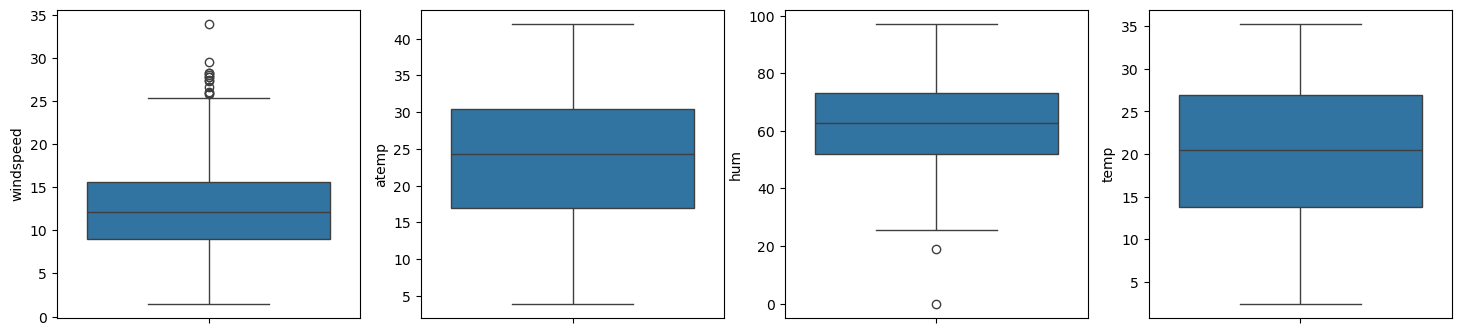

In [19]:
# Draw box plots for indepent variables with continuous values
cols = ['windspeed', 'atemp', 'hum', 'temp']
plt.figure(figsize=(18,4))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_analysis_df)
    i = i+1
plt.show()

In [20]:
#From these plots, we can see there are few outliers we will handle these later

In [21]:
# Handling categorical variables
# According to the dictionary, categorical variables include: season, yr, mnth, holiday, weekday, workingday, weathersit

bike_analysis_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_analysis_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_analysis_df.mnth = bike_analysis_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_analysis_df.weekday = bike_analysis_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

# Add a column 'year' from the 'yr' column: map 0 -> 2018, 1 -> 2019 for clarity
year_mapping = {0: 2018, 1: 2019}
bike_analysis_df.yr = bike_analysis_df.yr.replace({0: '2018',1: '2019'})

In [22]:
bike_analysis_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
# Converting datatype to category
categorical_columns = ['season', 'yr', 'mnth','weekday', 'weathersit']

def convert_to_category(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

bike_analysis_df = convert_to_category(bike_analysis_df, categorical_columns)

#### EDA

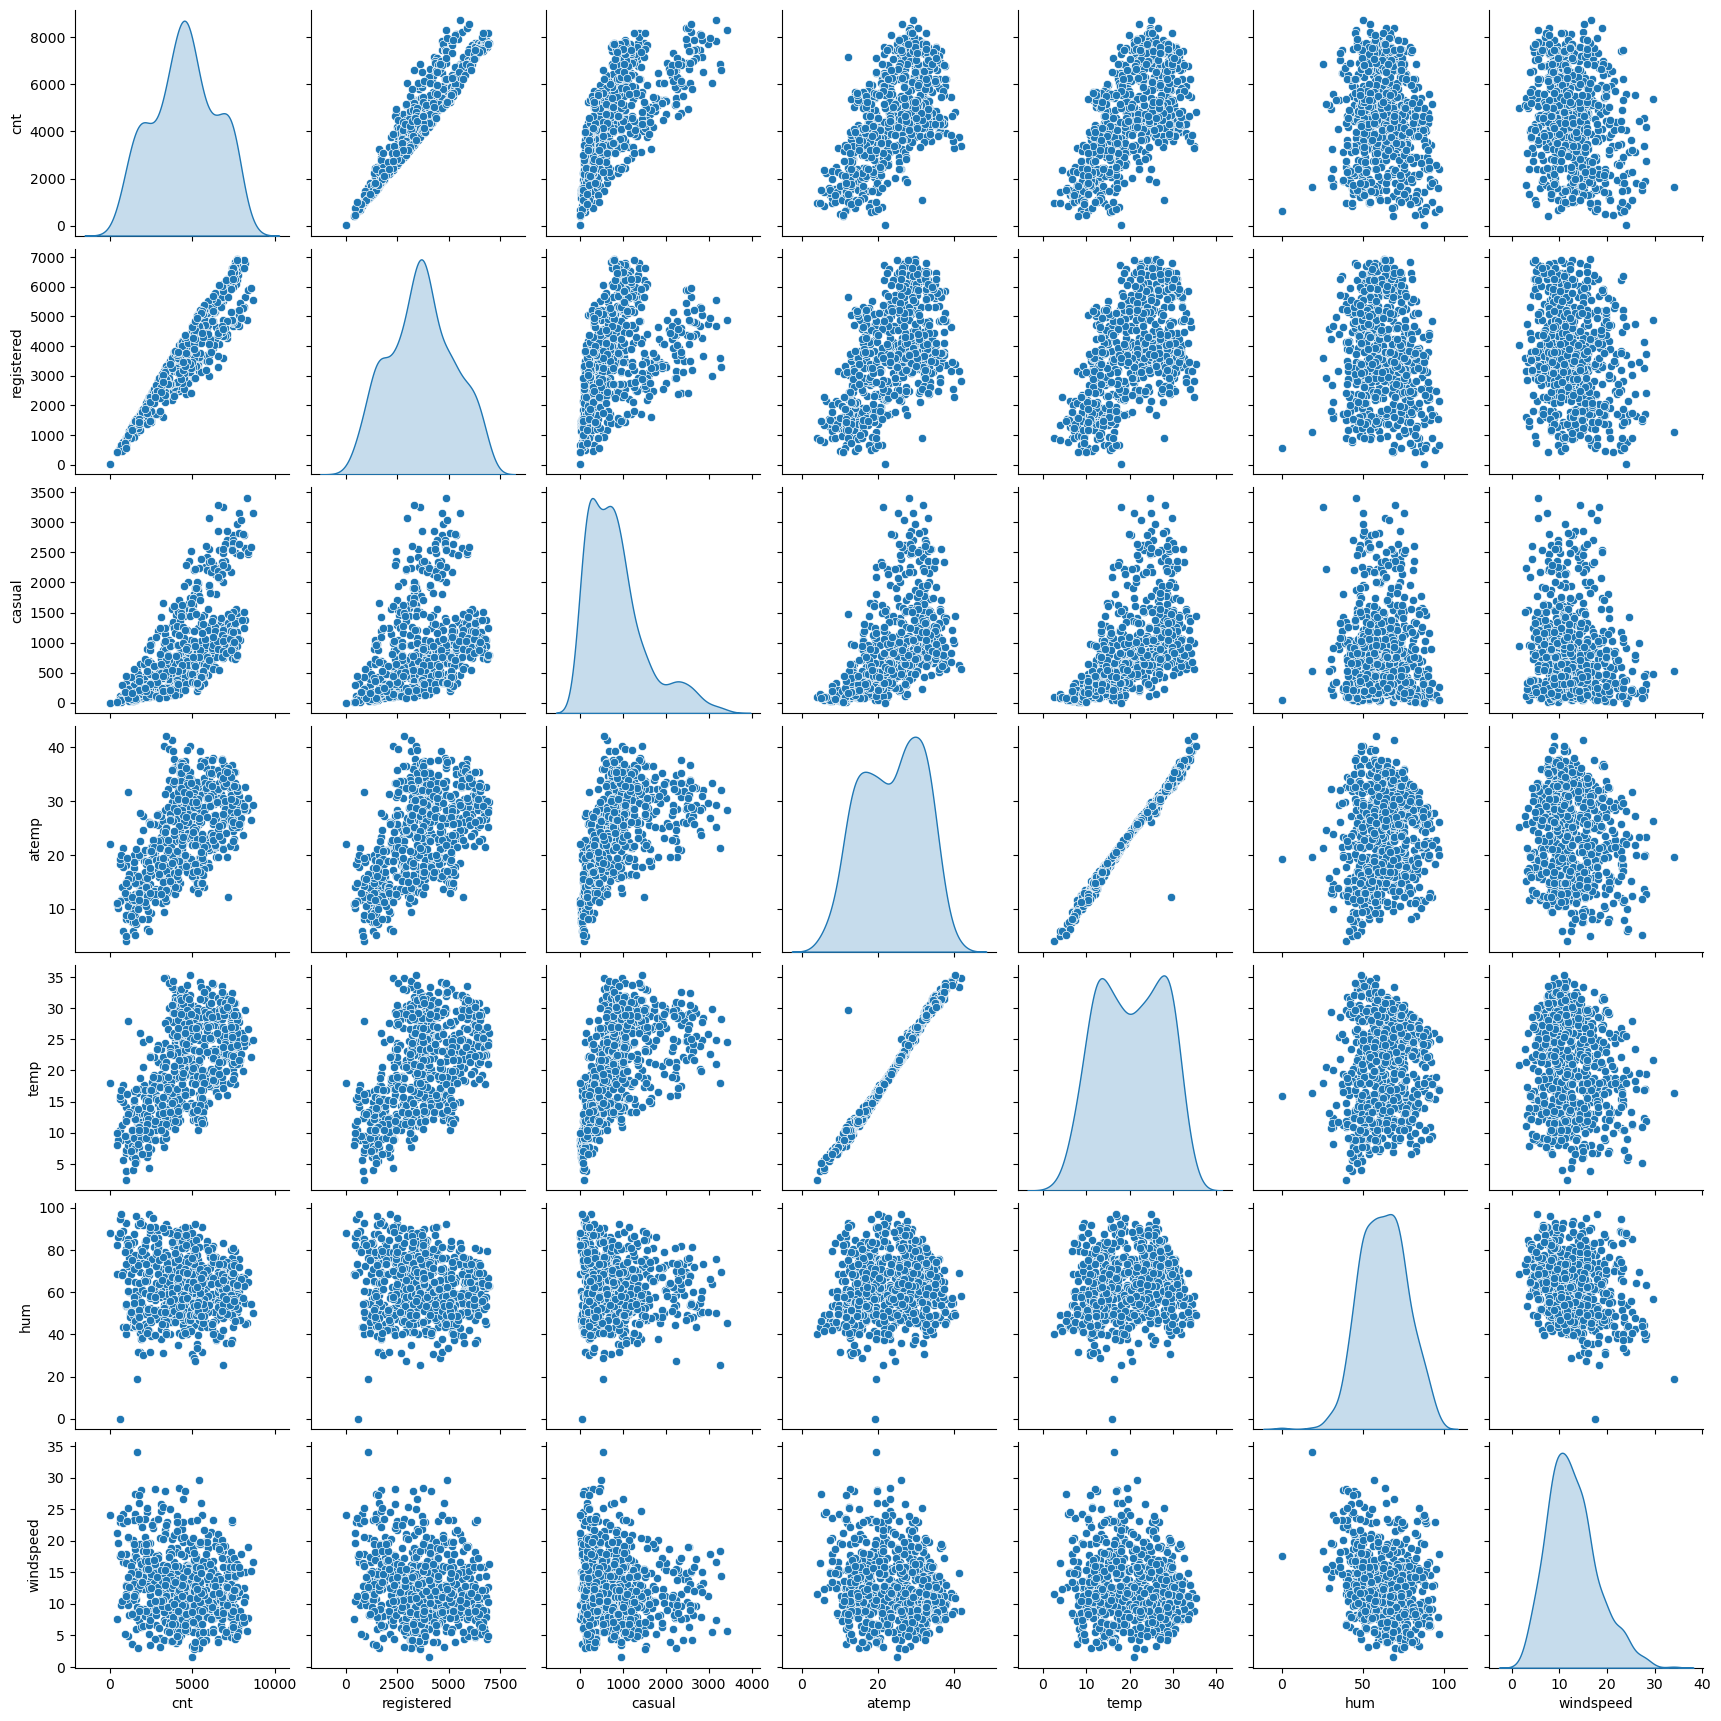

In [24]:
# Selecting numerical variables for pair-plot
numerical_vars = ["cnt", "registered", "casual", "atemp", "temp", "hum", "windspeed"]

# Plotting the pair-plot
sns.pairplot(bike_analysis_df[numerical_vars], diag_kind="kde")
plt.show()

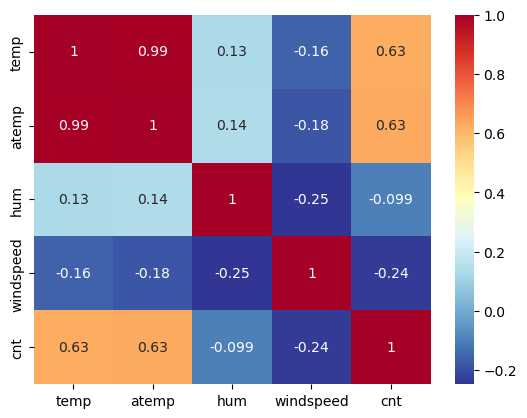

In [25]:
#Checking how continuous variable relate to each other
sns.heatmap(bike_analysis_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='RdYlBu_r', annot = True)
plt.show()

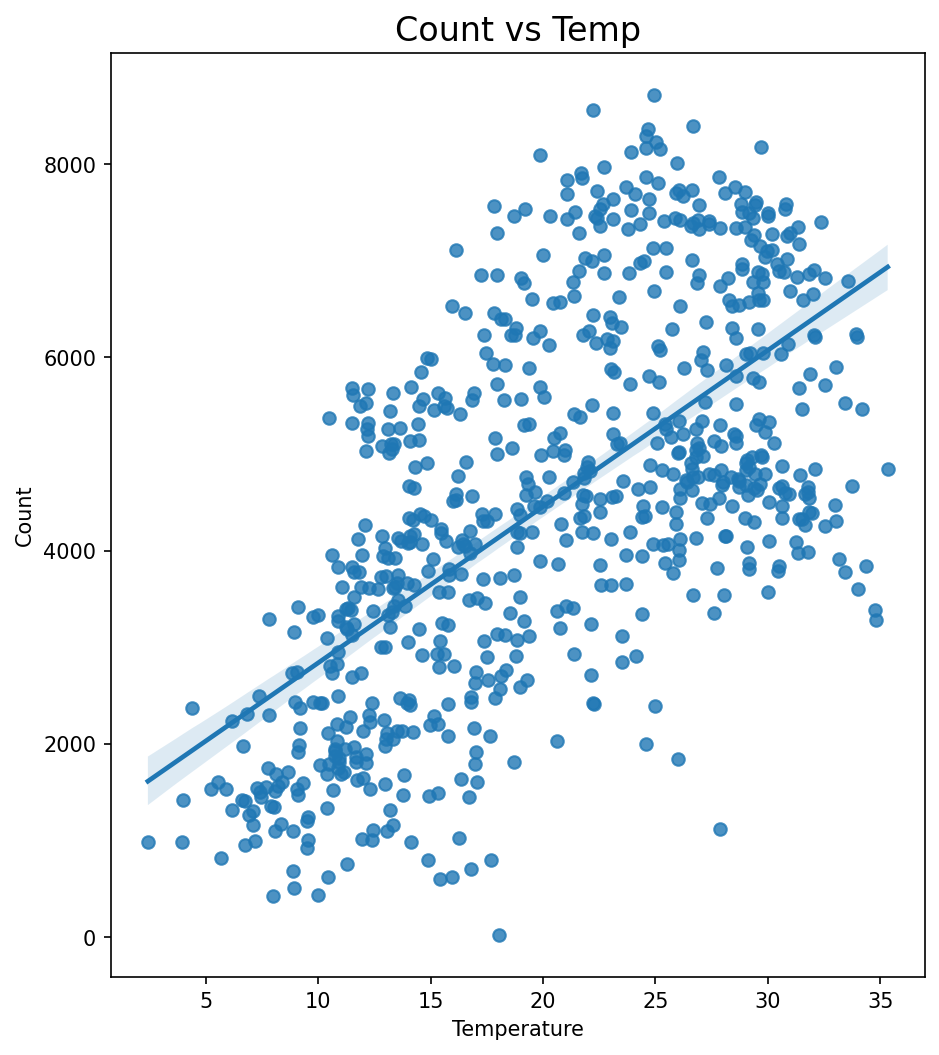

In [26]:
plt.figure(figsize=(7,8),dpi=150)
plt.title("Count vs Temp",fontsize=16)
sns.regplot(data=bike_analysis_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

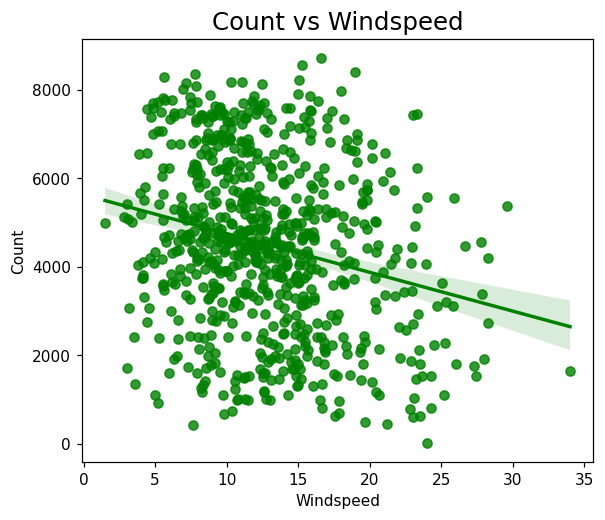

In [27]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data=bike_analysis_df,y="cnt",x="windspeed",color='green')
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()

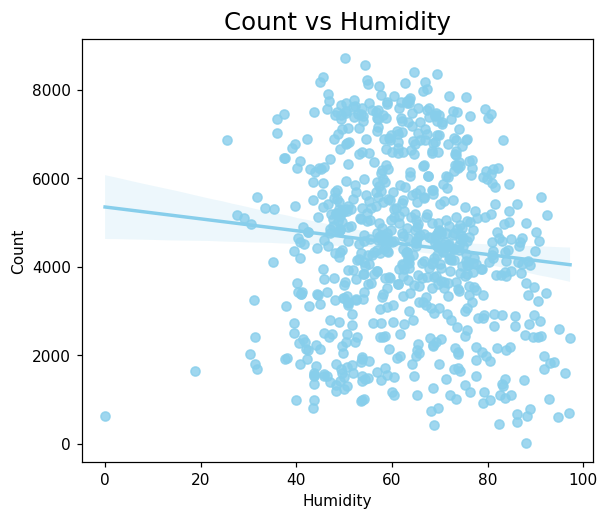

In [28]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=bike_analysis_df,y="cnt",x="hum",color='skyblue')
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

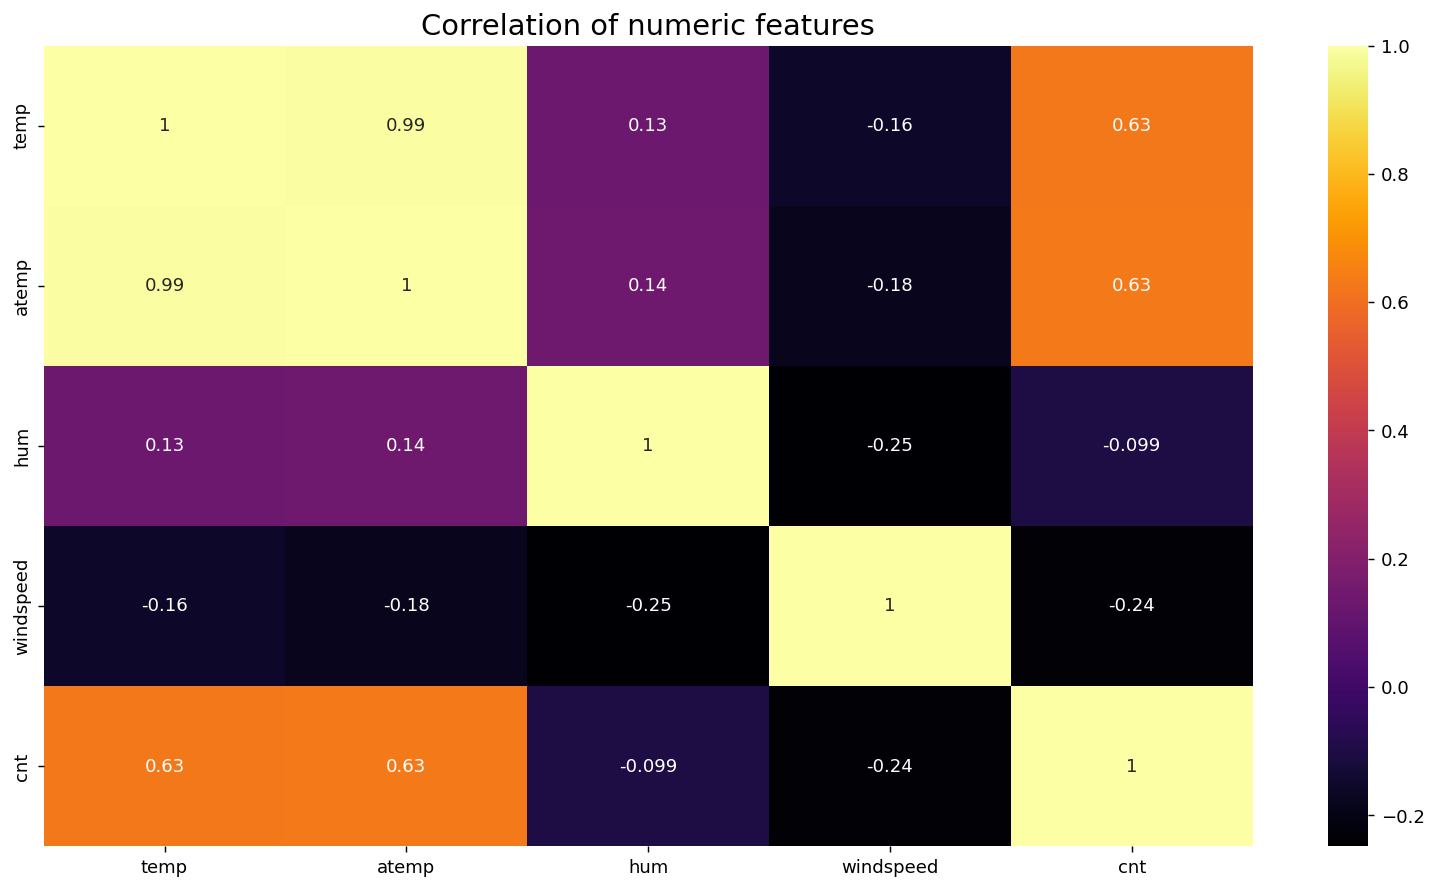

In [29]:
features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike_analysis_df[features].corr(),annot= True,cmap="inferno")
plt.show()

### Creating dummy variables for categorical variables

In [30]:
bike_analysis_df = pd.get_dummies(data=bike_analysis_df,columns=["season","mnth","weekday"],drop_first=True)
bike_analysis_df = pd.get_dummies(data=bike_analysis_df,columns=["weathersit"])

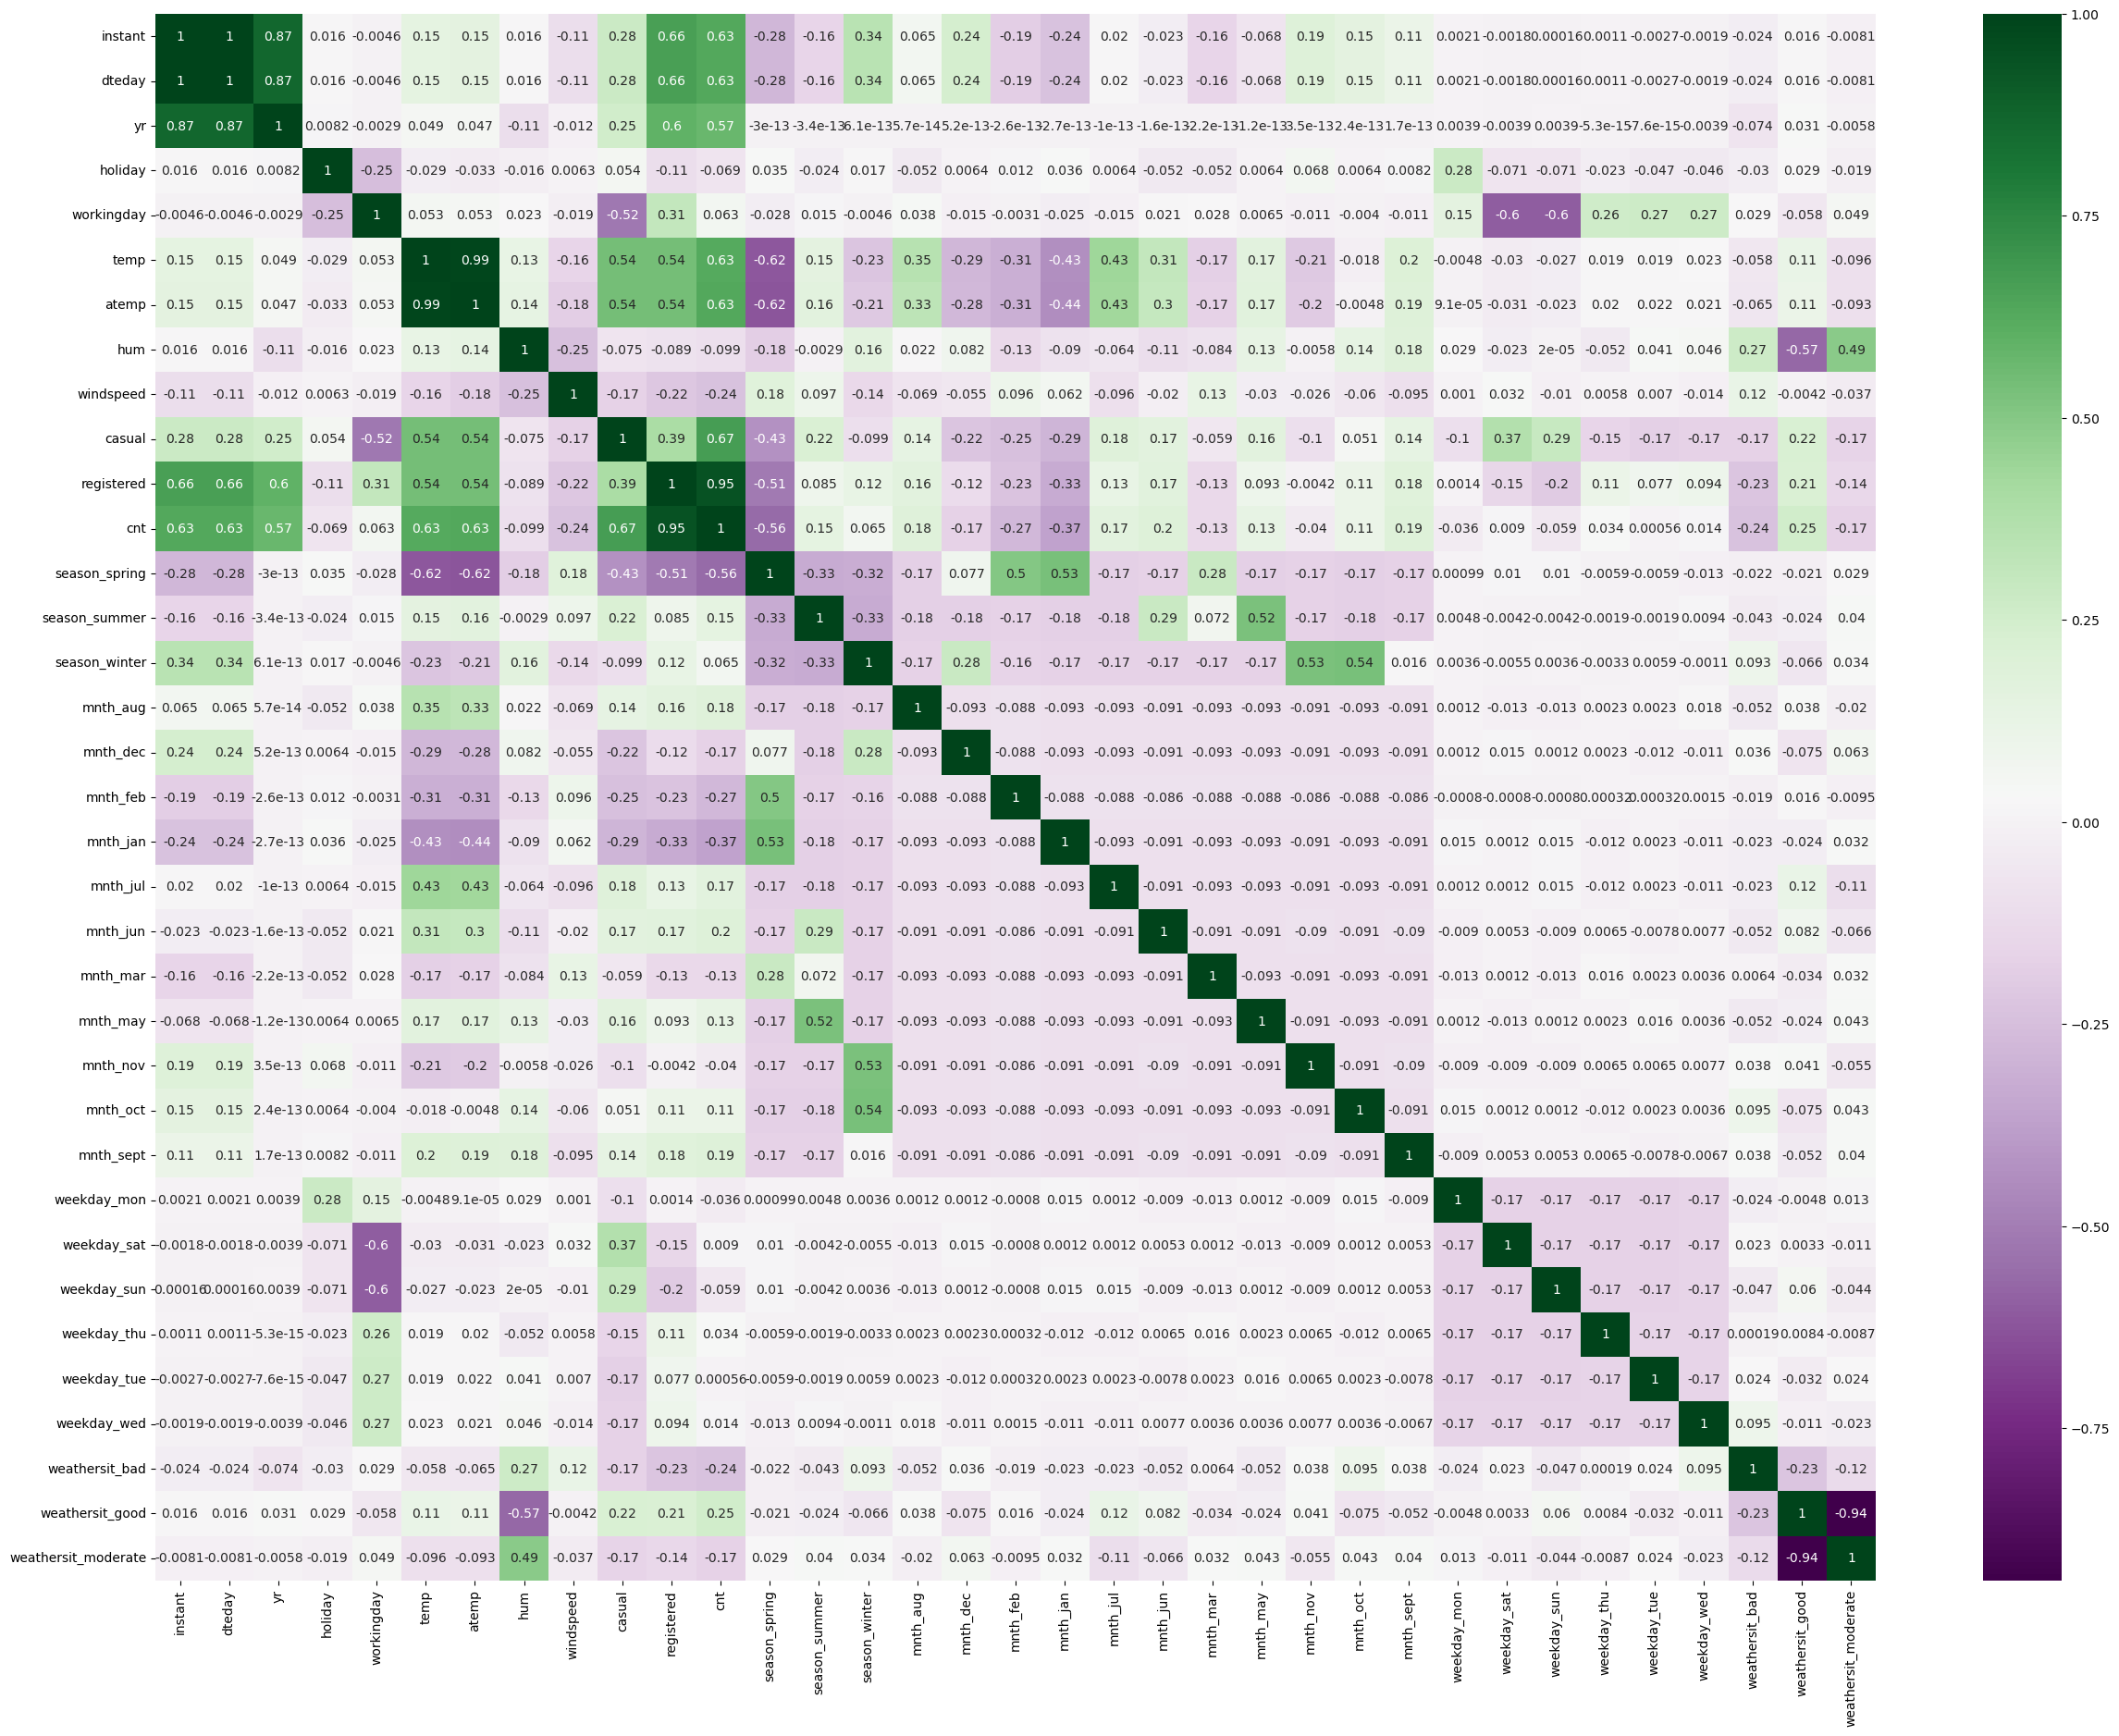

In [31]:
plt.figure(figsize = (30,22))
sns.heatmap(bike_analysis_df.corr(), annot = True, cmap="PRGn")
plt.show()

<h4>Model Building</h4>

In [32]:
# Dropping unnecessary columns
bike_analysis_df = bike_analysis_df.drop(columns=['instant', 'dteday', 'atemp', 'casual', 'registered'])

In [33]:
# Defining features and target variable
X = bike_analysis_df.drop(columns=['cnt'])
y = bike_analysis_df['cnt']

In [34]:
# Spliting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Feature Scaling continuous variables

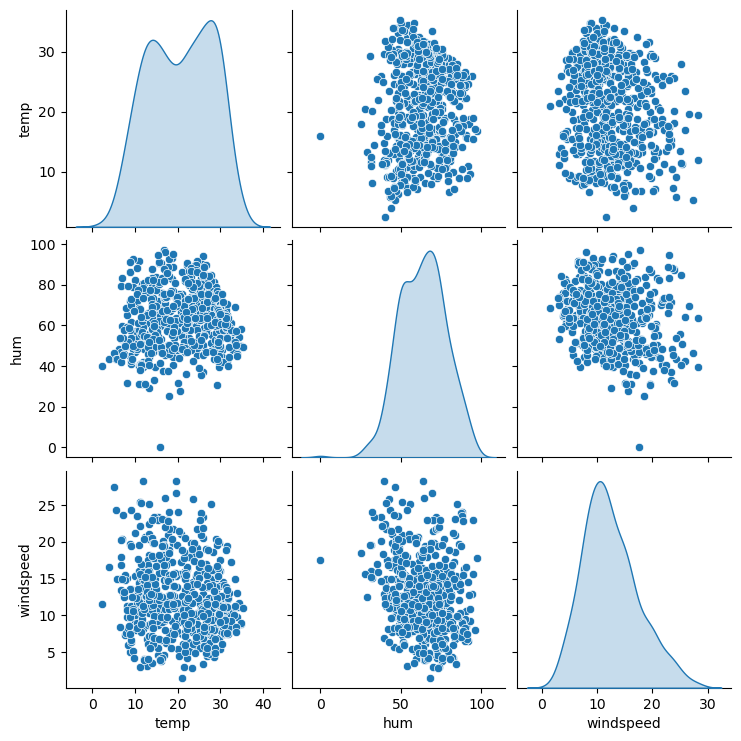

In [35]:
# Create a new dataframe of only numeric variables:

bike_analysis_numerical = X_train[['temp', 'hum', 'windspeed']]
sns.pairplot(bike_analysis_numerical, diag_kind='kde')
plt.show()

### Scaling the Features

In [36]:
# Let us scale continuous variables
num_variable = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_variable] = scaler.fit_transform(X_train[num_variable])

In [37]:
X_train.describe()

,holiday,workingday,temp,hum,windspeed
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.032534,0.672945,0.551484,0.654151,0.410017
std,0.177566,0.469540,0.227249,0.146644,0.187249
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354266,0.542745,0.276424
50%,0.000000,1.000000,0.566998,0.657578,0.379465
75%,0.000000,1.000000,0.745598,0.757346,0.520978
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
247,2018,1,0,0.765327,0.814513,0.475900,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
335,2018,0,1,0.317788,0.644911,0.195963,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
702,2019,0,1,0.519232,0.756118,0.379454,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
440,2019,0,0,0.566998,0.778874,0.220845,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
136,2018,0,1,0.626185,0.863461,0.637592,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


### Training the model

In [39]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 13),
 ('mnth_jan', False, 9),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 3),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [42]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [43]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

X_train_rfe.shape

(584, 15)

In [45]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    # Add a constant
    X_train_sm = sm.add_constant(X_train[cols].astype(float))

    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()

    # Check the parameters obtained
    # print(lm.params)

    print(lm.summary())
    return lm

In [46]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Residual Analysis

In [47]:
#Selected columns for all columns selected by RFE

cols = ['yr', 'holiday', 'workingday', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.32e-169
Time:                        22:13:31   Log-Likelihood:                -4828.8
No. Observations:                 584   AIC:                             9688.
Df Residuals:                     569   BIC:                             9753.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.162e+06   1

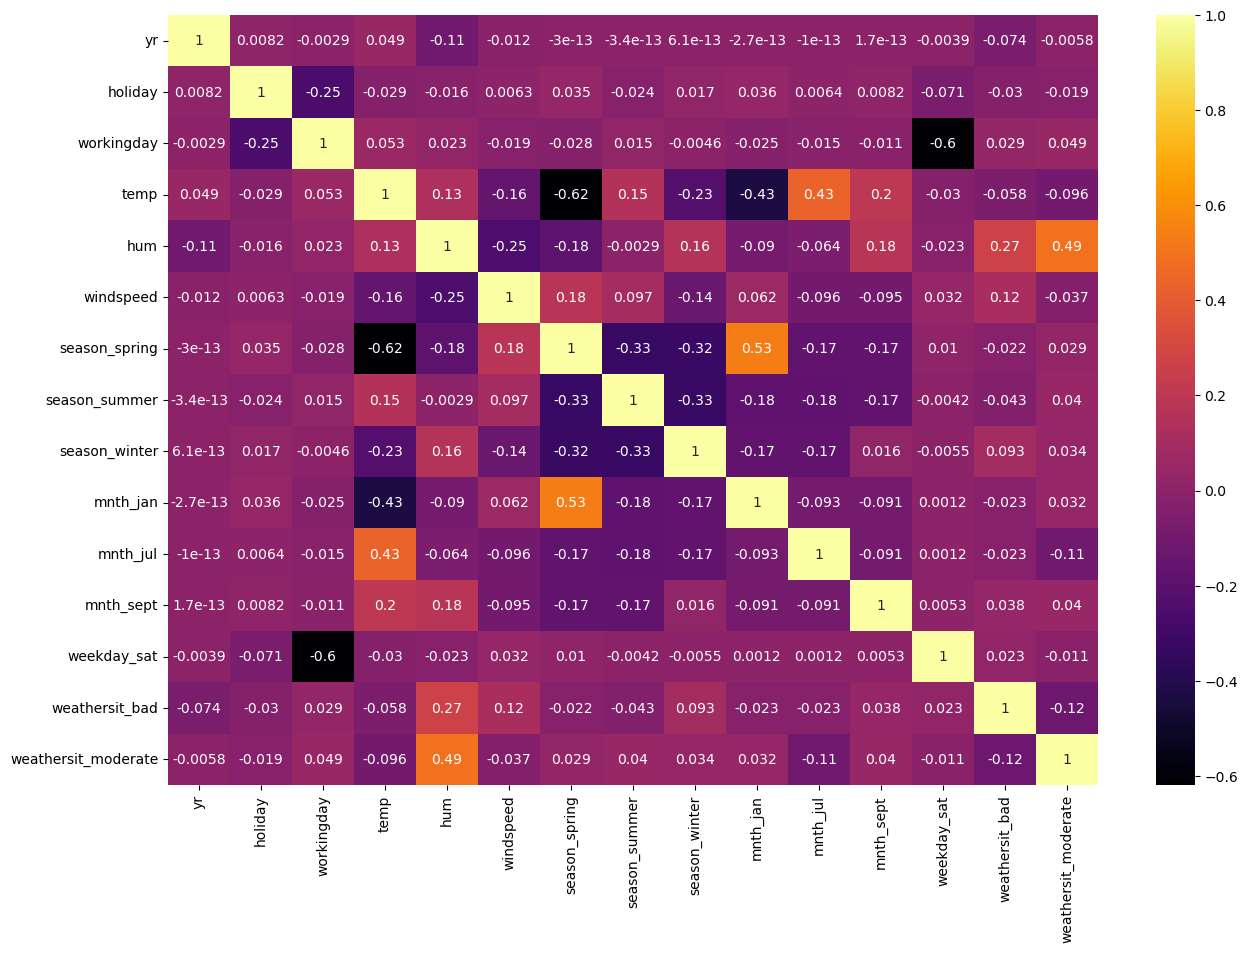

In [48]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_analysis_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='inferno', annot=True)
plt.show()

In [49]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     243.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.52e-207
Time:                        22:13:32   Log-Likelihood:                -4746.5
No. Observations:                 584   AIC:                             9517.
Df Residuals:                     572   BIC:                             9569.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.062e+06   1

In [50]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     224.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.16e-207
Time:                        22:13:32   Log-Likelihood:                -4744.4
No. Observations:                 584   AIC:                             9515.
Df Residuals:                     571   BIC:                             9572.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.062e+06   1

In [51]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     243.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.52e-207
Time:                        22:13:32   Log-Likelihood:                -4746.5
No. Observations:                 584   AIC:                             9517.
Df Residuals:                     572   BIC:                             9569.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.062e+06   1

In [52]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     89.13
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          7.23e-110
Time:                        22:13:32   Log-Likelihood:                -4979.8
No. Observations:                 584   AIC:                             9982.
Df Residuals:                     573   BIC:                         1.003e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.214e+06   2

In [53]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          6.72e-164
Time:                        22:13:32   Log-Likelihood:                -4852.2
No. Observations:                 584   AIC:                             9726.
Df Residuals:                     573   BIC:                             9774.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.217e+06   1

In [54]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.26e-201
Time:                        22:13:32   Log-Likelihood:                -4767.2
No. Observations:                 584   AIC:                             9554.
Df Residuals:                     574   BIC:                             9598.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.076e+06   1

In [55]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [56]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

-4076094.0327216093 [ 2020.76683585 -1104.84424538  -486.10572823   473.5875063
   457.53138339  -375.66785318 -2568.57242158  -642.30543218
  3985.63241955]


## Hypothesis Testing

### Final selected model
const 1849.3111
yr 2001.8857
season_spring -1170.1280
mnth_jul -482.8936
season_winter 494.7681
mnth_sept 483.0006
weekday_sun -335.8335
weathersit_bad -2305.3236
weathersit_moderate -665.3845
temp 3917.7338

### Model Evaluation

In [57]:
y_train_pred = lr.predict(X_train[cols])

In [58]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

In [59]:
plot_res_dist(y_train, y_train_pred)

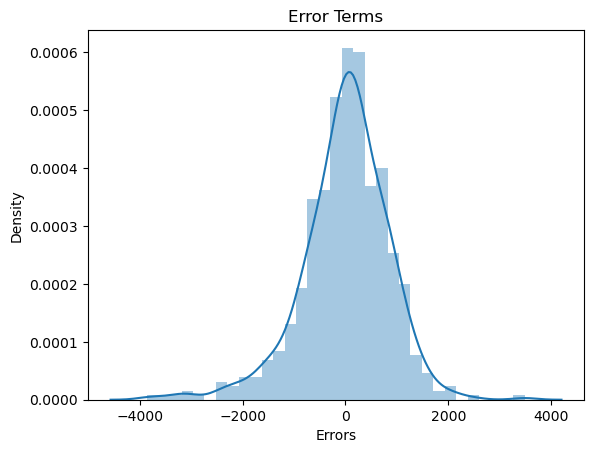

In [60]:
plt.show()

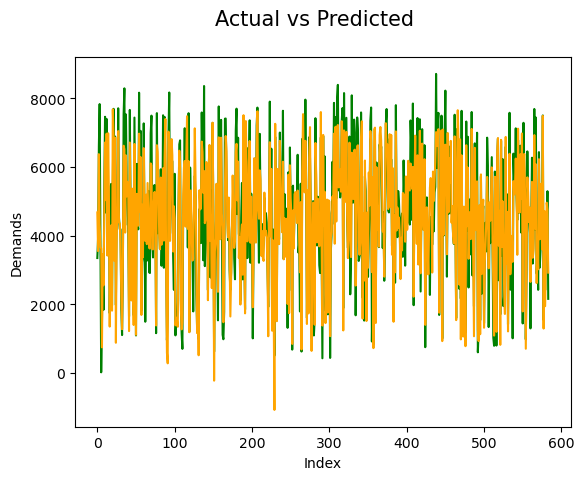

In [61]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="orange")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

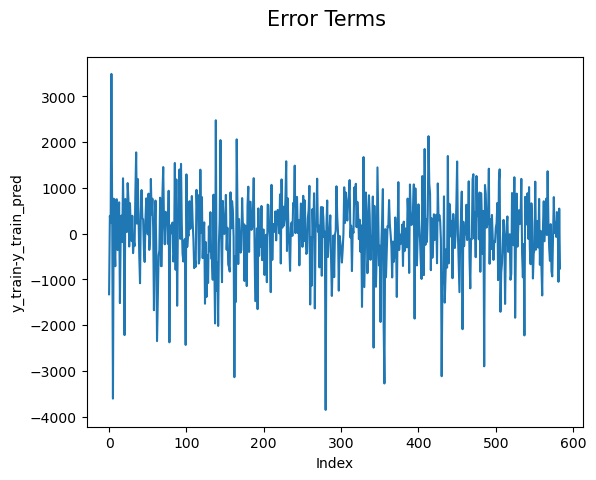

In [62]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Plot Test vs Predicted test values

In [63]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="yellow", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="green",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

In [64]:
y_test_pred = lr.predict(X_test[cols])

In [65]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

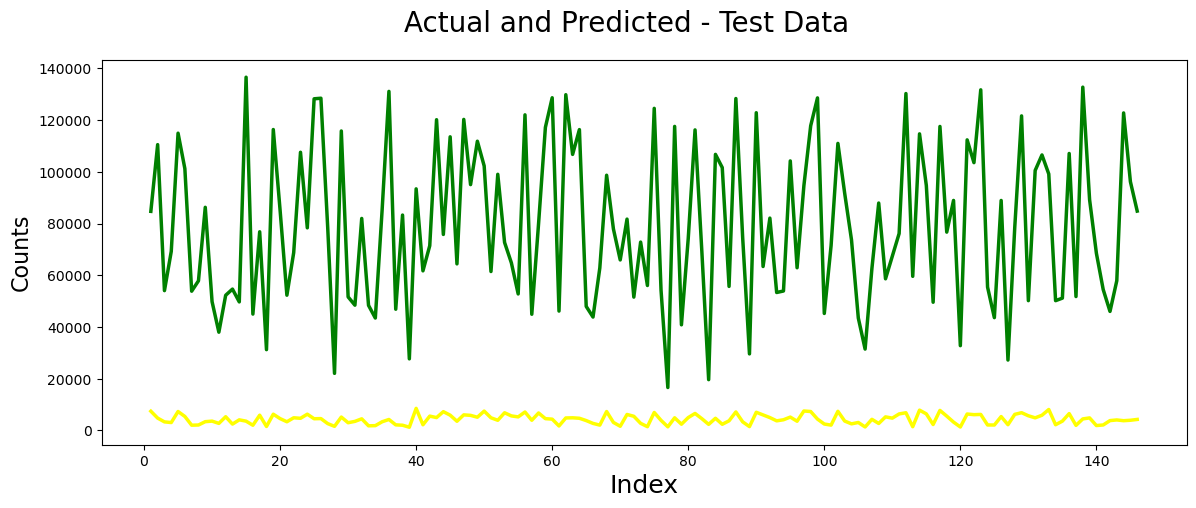

In [66]:
plt.show()

### Intrepretting the Model

In [67]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.26e-201
Time:                        22:13:32   Log-Likelihood:                -4767.2
No. Observations:                 584   AIC:                             9554.
Df Residuals:                     574   BIC:                             9598.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.076e+06   1

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.